# Task 2: Learning & Dynamics
Matrix games

Biased Rock-Paper-Scissors Game, Dispersion Game, Battle of the Sexes and Prisoners Dilemma

Games definitions:

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pyspiel
from open_spiel.python import rl_environment
from open_spiel.python.algorithms import tabular_qlearner, boltzmann_tabular_qlearner

In [3]:
# Definition of Games

matching_pennies_payoffs_1 = np.array( [[-1,1],
                                        [1,-1]])

matching_pennies_payoffs_2 = np.array( [[1,-1],
                                        [-1,1]])

matching_pennies_new = pyspiel.create_matrix_game("matching_pennies_new",
                                              "Matching Pennies Two",
                                              ["H", "T"], ["H", "T"],
                                              matching_pennies_payoffs_1,
                                              matching_pennies_payoffs_2)

# ROCK PAPER SCISSORS
rock_paper_scissors_payoffs = np.array([[0,-0.25,0.5],
                                        [0.25,0,-0.05],
                                        [-0.5,0.05,0]])

rock_paper_scissors = pyspiel.create_matrix_game("rock_paper_scissors",
                           "Biased Rock-Paper-Scissors",
                           ["R", "P", "S"], ["R", "P", "S"],
                           rock_paper_scissors_payoffs,
                           rock_paper_scissors_payoffs.T)

# DISPERSION GAME
dispersion_game_payoffs = np.array([[-1,1],
                                    [1,-1]])

dispersion_game = pyspiel.create_matrix_game("dispersion_game",
                           "Dispersion Game",
                           ["A", "B"], ["A", "B"],
                           dispersion_game_payoffs,
                           dispersion_game_payoffs)

# BATTLE OF SEXES
battle_of_the_sexes_payoffs_1 = np.array([[3,0],
                                          [0,2]])
battle_of_the_sexes_payoffs_2 = np.array([[2,0],
                                          [0,3]])

battle_of_the_sexes = pyspiel.create_matrix_game("battle_of_the_sexes",
                           "Battle Of The Sexes",
                           ["O", "M"], ["O", "M"],
                           battle_of_the_sexes_payoffs_1,
                           battle_of_the_sexes_payoffs_2)

# PRISONERS DILEMMA
prisoners_dilemma_payoffs_1 = np.array([[-1,-4],
                                        [0,-3]])
prisoners_dilemma_payoffs_2 = np.array([[-1,0],
                                        [-4,-3]])

prisoners_dilemma = pyspiel.create_matrix_game("prisoners_dilemma",
                           "Prisoners Dilemma",
                           ["C", "D"], ["C", "D"],
                           prisoners_dilemma_payoffs_1,
                           prisoners_dilemma_payoffs_2)

Setting up rl environment and agents:

In [3]:
def train(env, agents, training_episodes=100):
    rewards = []

    for cur_episode in range(training_episodes):
        time_step = env.reset()
        while not time_step.last():
            actions = [
                    agent.step(time_step).action
                    for agent in agents
                ]
            time_step = env.step(actions)
        # Episode is over, step all agents with final info state.
        for agent in agents:
            agent.step(time_step)
        rewards.append(time_step.rewards)

    print("training completed after", training_episodes, "episodes")
    return rewards

In [4]:
num_players = 2
env = rl_environment.Environment(rock_paper_scissors)
num_actions = env.action_spec()["num_actions"]
agents = [
  tabular_qlearner.QLearner(player_id=idx, num_actions=num_actions)
  for idx in range(num_players)
]

Training agents:

In [5]:
training_episodes = 100
rewards = train(env, agents, training_episodes)

training completed after 100 episodes


In [6]:
def plot_learning_trajectory(rewards, training_episodes=100):
    plt.plot(range(training_episodes), rewards, )
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    plt.title('Learning Trajectory')
    plt.legend(["Player 1","Player 2"])
    plt.show()

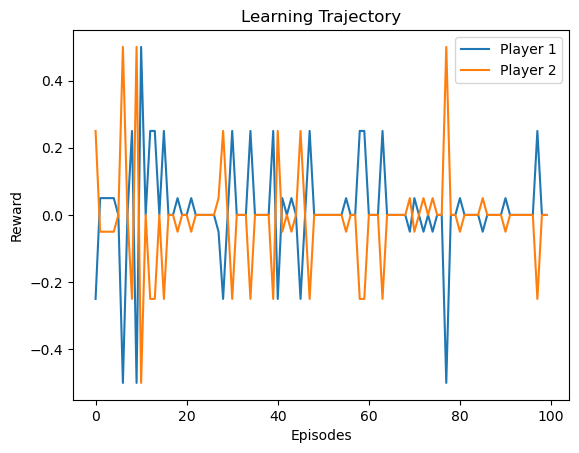

In [7]:
plot_learning_trajectory(rewards, training_episodes)

Lenient Boltzmann Q-learning

In [8]:
env = rl_environment.Environment(rock_paper_scissors)
num_actions = env.action_spec()["num_actions"]
agents = [
  boltzmann_tabular_qlearner.BoltzmannQLearner(player_id=idx, num_actions=num_actions)
  for idx in range(num_players)
]

training completed after 100 episodes


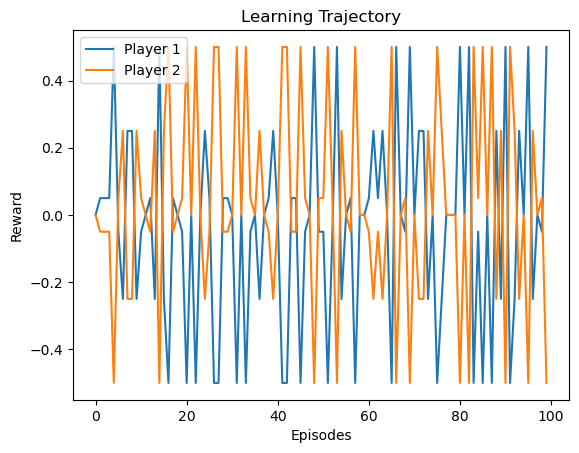

In [9]:
training_episodes = 100
rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

Dispersion Game

training completed after 100 episodes


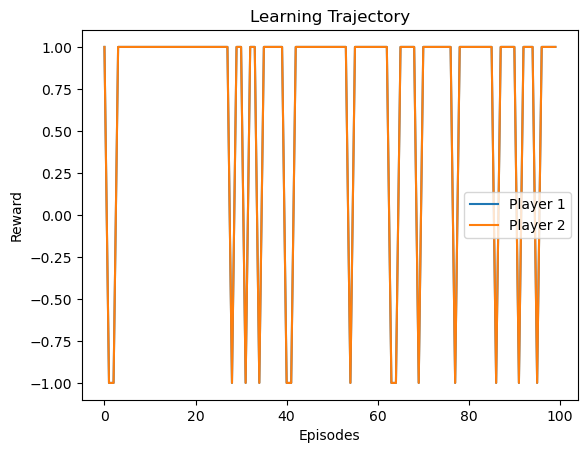

training completed after 100 episodes


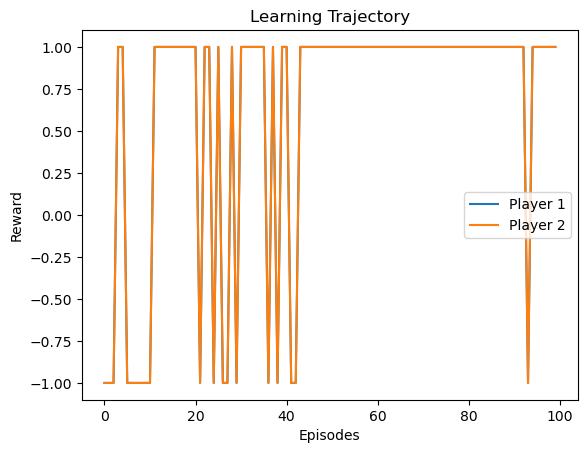

In [10]:
env = rl_environment.Environment(dispersion_game)
num_actions = env.action_spec()["num_actions"]
agents = [
    tabular_qlearner.QLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]
training_episodes = 100
rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

agents = [
    boltzmann_tabular_qlearner.BoltzmannQLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]

rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

Battle of the sexes

training completed after 100 episodes


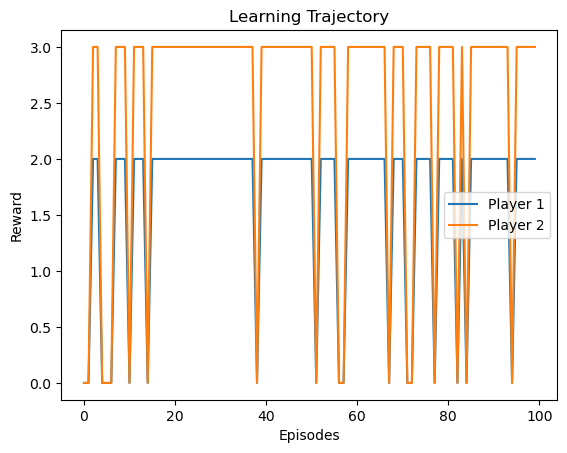

training completed after 100 episodes


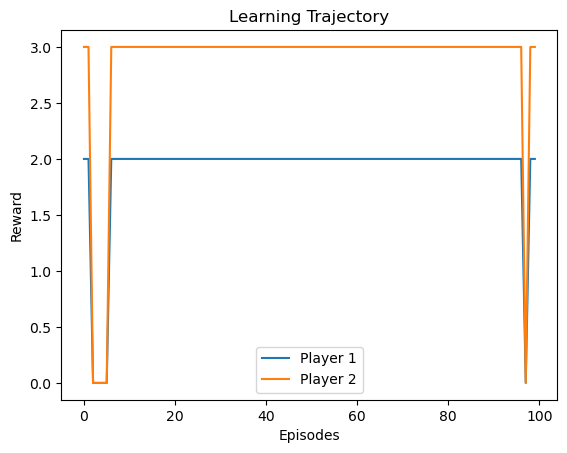

In [11]:
env = rl_environment.Environment(battle_of_the_sexes)
num_actions = env.action_spec()["num_actions"]
agents = [
    tabular_qlearner.QLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]
training_episodes = 100
rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

agents = [
    boltzmann_tabular_qlearner.BoltzmannQLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]

rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

Prisoners dillema

training completed after 100 episodes


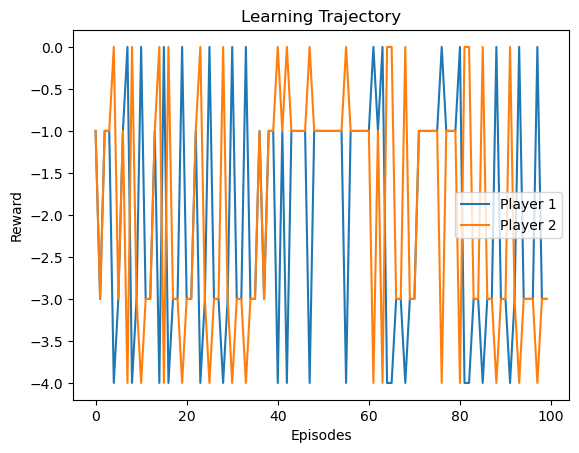

training completed after 100 episodes


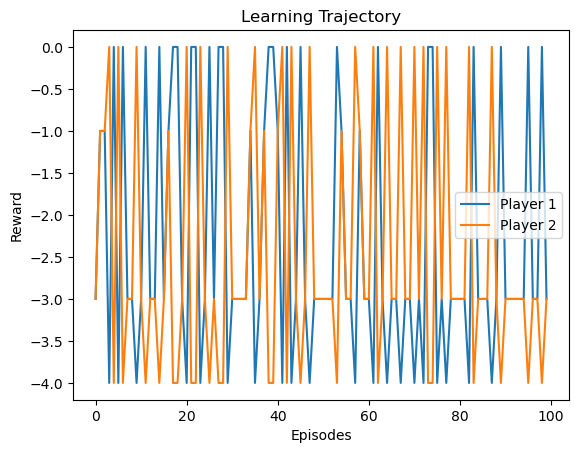

In [12]:
env = rl_environment.Environment(prisoners_dilemma)
num_actions = env.action_spec()["num_actions"]
agents = [
    tabular_qlearner.QLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]
training_episodes = 100
rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

agents = [
    boltzmann_tabular_qlearner.BoltzmannQLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]

rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

In [4]:
# Creates labels for games
plot_labels = { "dispersion_game": ["Player 1: prob of choosing A", "Player 2: prob of choosing A"],
                "prisoners_dilemma": ["Player 1: prob of choosing Defect", "Player 2: prob of choosing Defect"],
                "battle_of_the_sexes": ["Player 1: prob of choosing Ballet", "Player 2: prob of choosing Ballet"],
                "biased_rock_paper_scissors": ["Rock", "Paper", "Scissors"], }

In [28]:
from open_spiel.python.egt.utils import game_payoffs_array
from open_spiel.python.egt.dynamics import SinglePopulationDynamics, replicator, MultiPopulationDynamics
%matplotlib qt

# Holds games 2x2
games = [dispersion_game, battle_of_the_sexes, prisoners_dilemma]

# Creating Dynamic Plots
def phase_plot_2x2(games):
    plt.figure(figsize=(12, 8))
    num_points = 10
    prob = np.linspace(0., 1., num_points + 2)[1:-1]
    x, y = np.meshgrid(prob, prob)

    for g, game in enumerate(games):
        payoff_tensor = game_payoffs_array(game)
        dyn = MultiPopulationDynamics(payoff_tensor, replicator)
        u = np.empty(x.shape)
        v = np.empty(x.shape)

        # Plotting dyn in each axis
        ax = plt.subplot2grid((2, len(games)), (0, g))
        for i in range(num_points):
            for j in range(num_points):
                row_state = np.array([x[i, j], 1. - x[i, j]])
                col_state = np.array([y[i, j], 1. - y[i, j]])
                state = np.concatenate((row_state, col_state))
                dstate = dyn(state)
                u[i][j] = dstate[0]
                v[i][j] = dstate[2]
        ax.quiver(x, y, u, v)
        plt.title(game.get_type().long_name.title())
        plt.xlabel(plot_labels[game.get_type().short_name][0])
        plt.ylabel(plot_labels[game.get_type().short_name][1])
        plt.xlim(-0.01, 1.01)
        plt.ylim(-0.01, 1.01)
        plt.tight_layout(pad=1.12)

        # Plotting dyn in each axis
        linewidth="velocity"
        color="velocity"
        if linewidth == "velocity" or color == "velocity":
            vel = np.sqrt(u**2 + v**2)
            vel = vel - np.min(vel)
            vel = vel / np.max(vel)

            if linewidth == "velocity":
                linewidth = 3. * vel

            if color == "velocity":
                color = vel

        ax = plt.subplot2grid((2, len(games)), (1, g))
        ax.streamplot(x, y, u, v, minlength=0.1, linewidth=linewidth, color=color)
        plt.title(game.get_type().long_name.title())
        plt.xlabel(plot_labels[game.get_type().short_name][0])
        plt.ylabel(plot_labels[game.get_type().short_name][1])
        plt.xlim(-0.01, 1.01)
        plt.ylim(-0.01, 1.01)
        plt.tight_layout(pad=1.12)

    plt.show()

phase_plot_2x2(games)

In [27]:
# For Saving Overleaf graphs
def save_QuiverStream_Plots(games):
    num_points = 10
    prob = np.linspace(0., 1., num_points + 2)[1:-1]
    x, y = np.meshgrid(prob, prob)

    for game in games:
        payoff_tensor = game_payoffs_array(game)
        dyn = MultiPopulationDynamics(payoff_tensor, replicator)
        u = np.empty(x.shape)
        v = np.empty(x.shape)

        # Plotting dyn in each axis
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111)
        for i in range(num_points):
            for j in range(num_points):
                row_state = np.array([x[i, j], 1. - x[i, j]])
                col_state = np.array([y[i, j], 1. - y[i, j]])
                state = np.concatenate((row_state, col_state))
                dstate = dyn(state)
                u[i][j] = dstate[0]
                v[i][j] = dstate[2]
        ax.quiver(x, y, u, v)
        plt.title(game.get_type().long_name.title())
        plt.xlabel(plot_labels[game.get_type().short_name][0])
        plt.ylabel(plot_labels[game.get_type().short_name][1])
        plt.xlim(-0.01, 1.01)
        plt.ylim(-0.01, 1.01)
        plt.tight_layout(pad=1.12)
        plt.savefig("images/directional_field_" + game.get_type().short_name + ".png")

        # Plotting dyn in each axis
        linewidth="velocity"
        color="velocity"
        if linewidth == "velocity" or color == "velocity":
            vel = np.sqrt(u**2 + v**2)
            vel = vel - np.min(vel)
            vel = vel / np.max(vel)

            if linewidth == "velocity":
                linewidth = 3. * vel

            if color == "velocity":
                color = vel

        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111)
        ax.streamplot(x, y, u, v, minlength=0.1, linewidth=linewidth, color=color)
        plt.title(game.get_type().long_name.title())
        plt.xlabel(plot_labels[game.get_type().short_name][0])
        plt.ylabel(plot_labels[game.get_type().short_name][1])
        plt.xlim(-0.01, 1.01)
        plt.ylim(-0.01, 1.01)
        plt.tight_layout(pad=1.12)
        plt.savefig("images/streamline_" + game.get_type().short_name + ".png")

save_QuiverStream_Plots(games)